<a href="https://colab.research.google.com/github/ednavivianasegura/CodigosEnGeneral/blob/main/GraficosTLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ephem
!pip install seaborn
!git clone https://github.com/ednavivianasegura/CodigosEnGeneral.git


fatal: destination path 'CodigosEnGeneral' already exists and is not an empty directory.


       Semieje mayor (a)  Excentricidad (e)  Inclinación (i)  \
count         314.000000         314.000000       314.000000   
mean        29613.207962           0.000283        55.274370   
std            59.209095           0.000143         0.122202   
min         29598.776831           0.000038        55.063000   
25%         29600.101947           0.000233        55.175649   
50%         29600.123680           0.000286        55.267448   
75%         29600.161793           0.000335        55.376202   
90%         29600.199790           0.000395        55.447831   
max         29954.706675           0.001657        55.491402   

       Longitud del nodo ascendente ($\Omega$)  \
count                               314.000000   
mean                                 85.462102   
std                                   5.074711   
min                                  76.834602   
25%                                  81.154099   
50%                                  85.479000   
75%      

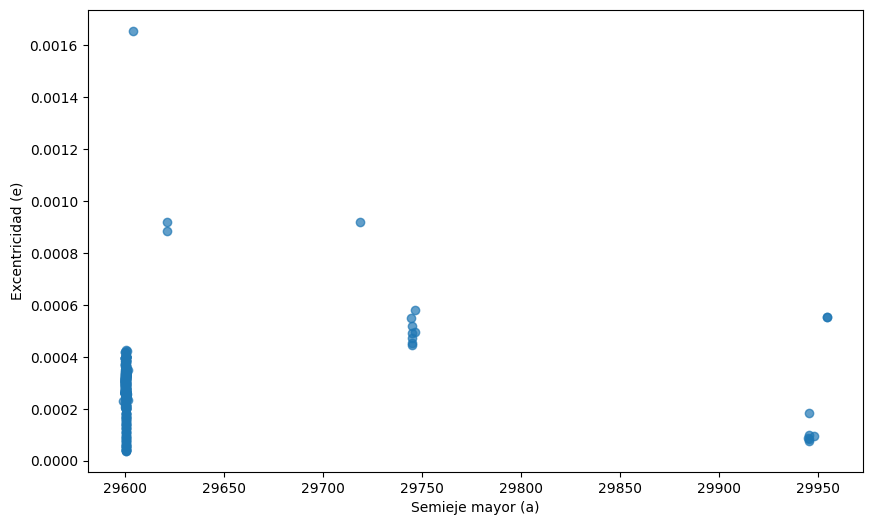

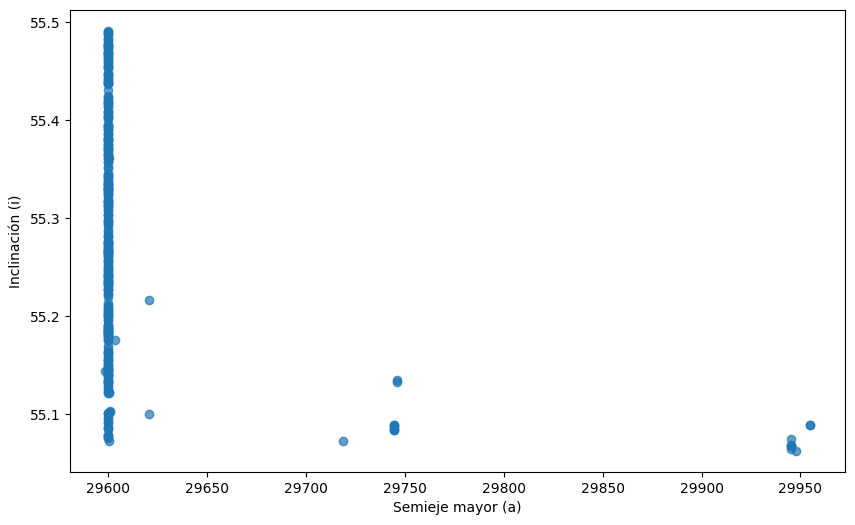

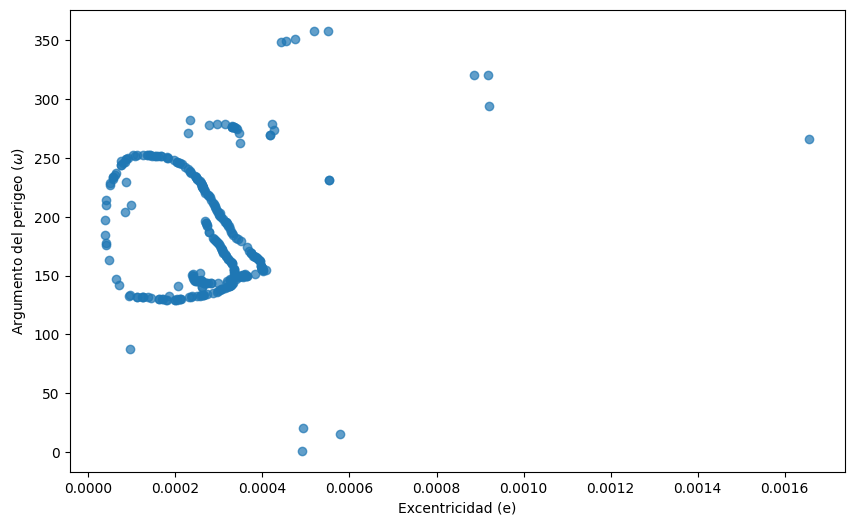

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 13/03/2025

@author: edsegualv
"""

import pandas as pd
import sys
import ephem
import math
from matplotlib import pyplot as plt
import seaborn as sns


tle_file_path="/content/CodigosEnGeneral/TLE_GALILEO_8.tle"

with open(tle_file_path, "r") as file:
    data=file.read().split("\n")


mu = 398600
pi = math.pi


def parse_tle(line1, line2):
    satellite = ephem.readtle('Satellite', line1, line2)
    n=satellite.n
    # print(f"line1 es: {line1}")
    # print(f"line2 es: {line2}")
    # print(f"El primer n es: {n}")
    n=n*(2*pi/86400)
    return ((mu/n**2)**(1/3), satellite.e, satellite.inc, satellite.raan, satellite.ap,  satellite.M)


lines1 = data[:-2:2]
lines2 = data[1:-1:2]


elements = [parse_tle(line1, line2) for line1 ,line2 in zip(lines1,lines2)]

# Definir los nombres de las columnas
nombres_columnas = ['Semieje mayor (a)', 'Excentricidad (e)', 'Inclinación (i)', "Longitud del nodo ascendente ($\Omega$)", "Argumento del perigeo ($\omega$)", 'Anomalía media (M)']

# Crear un DataFrame a partir de la lista de tuplas y los nombres de las columnas
dataframe = pd.DataFrame(elements, columns=nombres_columnas)
# # dataframe = dataframe.drop_duplicates()

resumen = dataframe.describe(include='all',percentiles=[.25, .5, .75,.90])
print(resumen)
dataframe["TLE"]= range(1,315)



#################################################################
#################################################################
# gráfico a vs e
#################################################################
#################################################################


plt.figure(figsize=(10, 6))
plt.scatter(dataframe['Semieje mayor (a)'], dataframe['Excentricidad (e)'], alpha=0.7)
plt.xlabel('Semieje mayor (a)')
plt.ylabel('Excentricidad (e)')
plt.show()

# #################################################################
# #################################################################
# # gráfico a vs i
# #################################################################
# #################################################################


plt.figure(figsize=(10, 6))
plt.scatter(dataframe['Semieje mayor (a)'], dataframe['Inclinación (i)'], alpha=0.7)
plt.xlabel('Semieje mayor (a)')
plt.ylabel('Inclinación (i)')
plt.show()


# #################################################################
# #################################################################
# # gráfico e vs w
# #################################################################
# #################################################################


plt.figure(figsize=(10, 6))
plt.scatter(dataframe['Excentricidad (e)'], dataframe['Argumento del perigeo ($\\omega$)'], alpha=0.7)
plt.xlabel('Excentricidad (e)')
plt.ylabel('Argumento del perigeo ($\\omega$)')
plt.show()




